In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

import sklearn
from tqdm import tqdm
import math

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [125]:
df = pd.read_csv("/Users/kjwang/Apester/zeev_test_1%2Ftable-000000000000.csv")
df_filter = df[['slide_category','slide_title_translated']]

In [126]:
le = preprocessing.LabelEncoder()
le_cat = le.fit_transform(df_filter['slide_category'])
le_trans = le.fit_transform(df_filter['slide_title_translated'])

In [131]:
# begin clustering
from sklearn.cluster import KMeans
X = np.transpose(np.array([le_cat, le_trans]))

In [132]:
def dist(a, b):
    return np.linalg.norm(a-b)

In [133]:
kVals = list(range(1,10))
sse = np.zeros(len(kVals))

for i in range(1,len(kVals)):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    centroids = kmeans.cluster_centers_
    clusters = kmeans.fit_predict(X)
    
    # calculate ideal value of k
    for j in range(0, len(X)):
        index = clusters[j]
        sse[i-1] += math.pow(dist(X[j], centroids[index]), 2)

[4.20100594e+12 1.03307837e+12 4.36642498e+11 2.56343048e+11
 1.64009558e+11 1.15239757e+11 8.64082374e+10 7.00665499e+10
 0.00000000e+00]


In [134]:
# graph to utilize elbow method
#plt.plot(kVals, sse)
#plt.show()

In [135]:
# we find that the best is k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# getting the cluster centers
C = kmeans.cluster_centers_
# predicting the clusters
labels = kmeans.predict(X)

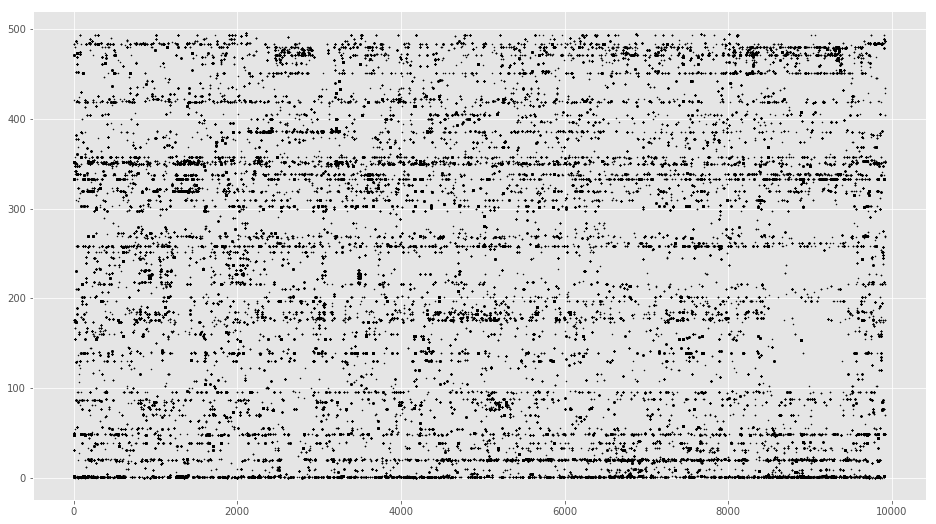

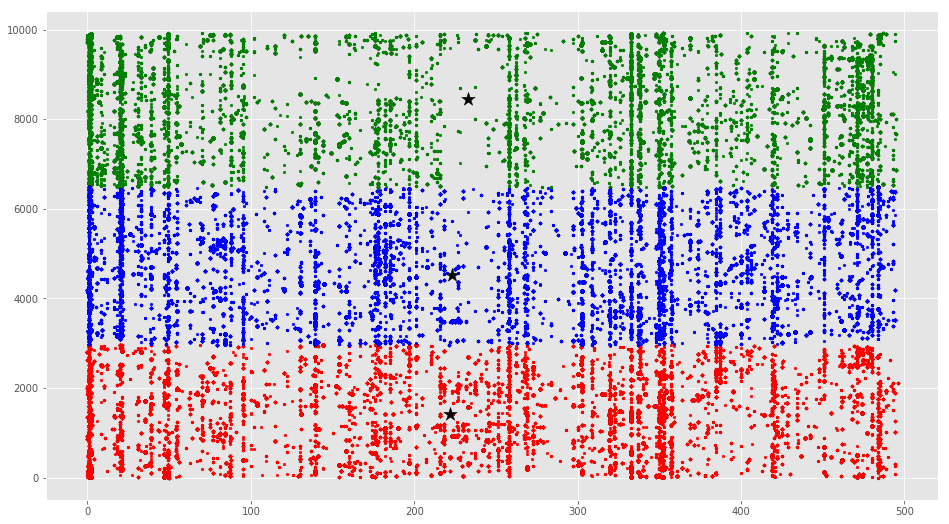

In [137]:
# visualizing k-means
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(le_trans, le_cat, c='black', s=1)

colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(C)):
    points = np.array(tuple(X[j] for j in range(len(X)) if labels[j] == i))
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
